## Time Series Analysis for Sparkling Wine

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [173]:
df = pd.read_csv("Sparkling.csv")

In [174]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [175]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [176]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [177]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [178]:
df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [179]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

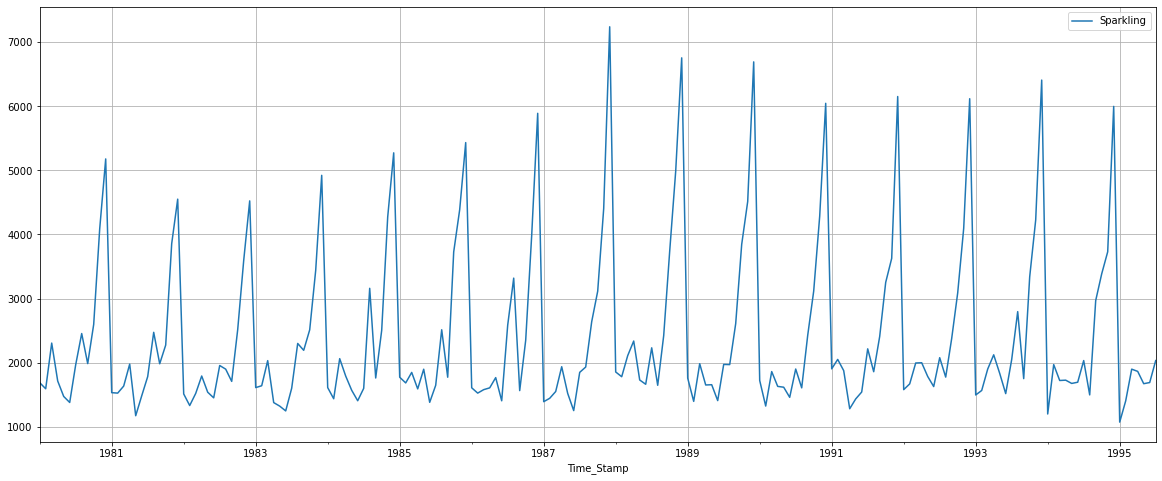

In [180]:
df.plot()
plt.grid();

In [181]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [182]:
df.isnull().sum()

Sparkling    0
dtype: int64

Text(0, 0.5, 'Distribution')

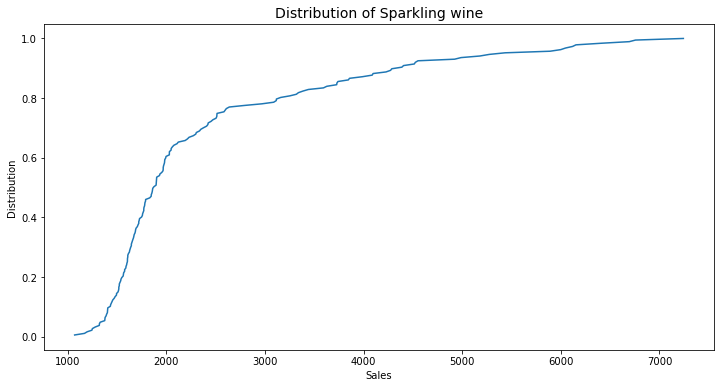

In [183]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (12, 6))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels")
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

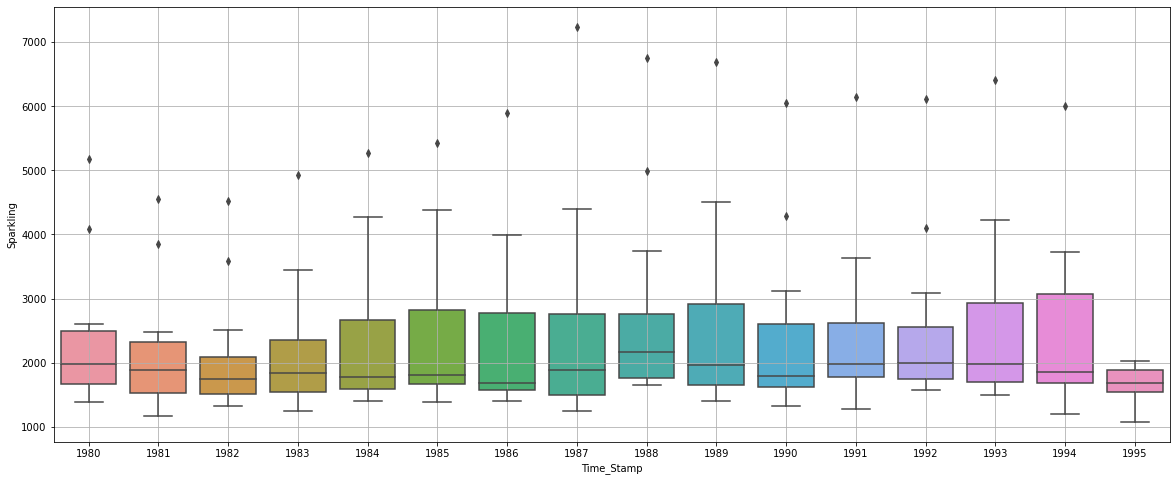

In [184]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

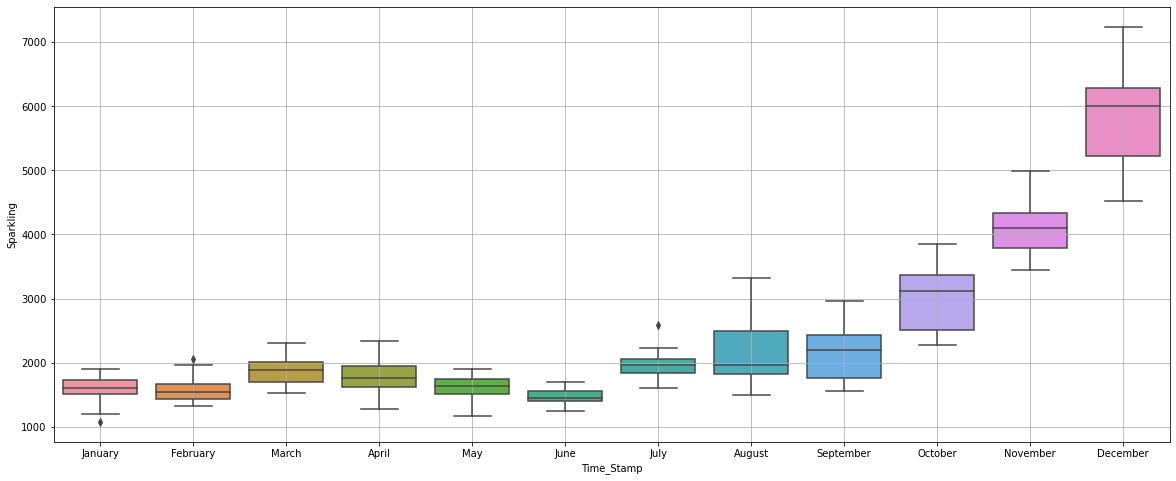

In [185]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

In [186]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.year, index = df.index.month)
monthly_sales_across_years

Time_Stamp    1980    1981    1982    1983    1984    1985    1986    1987  \
Time_Stamp                                                                   
1           1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0   
2           1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0   
3           2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0   
4           1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0   
5           1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0   
6           1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0   
7           1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0   
8           2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0   
9           1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0   
10          2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0   
11          4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0   
12          5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0   

Time_Stamp    1988    1989    1990    1991    1992    1993    1994    1995  
Time_Stamp                                                                  
1           1853.0  1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
2           1779.0  1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
3           2108.0  1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
4           2336.0  1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
5           1728.0  1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
6           1661.0  1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
7           2230.0  1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
8           1645.0  1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
9           2421.0  2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
10          3740.0  3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
11          4988.0  4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
12          6757.0  6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

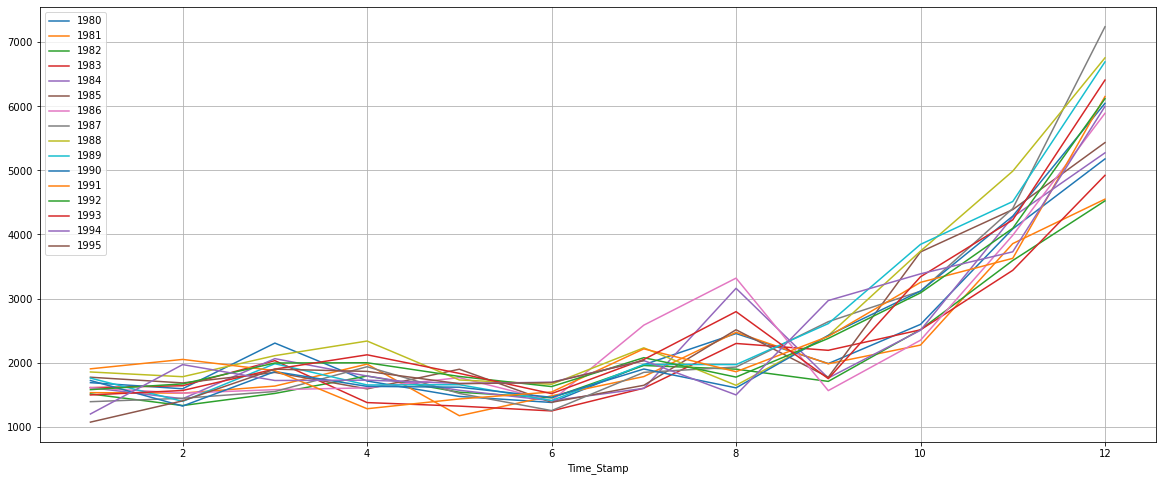

In [187]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plo

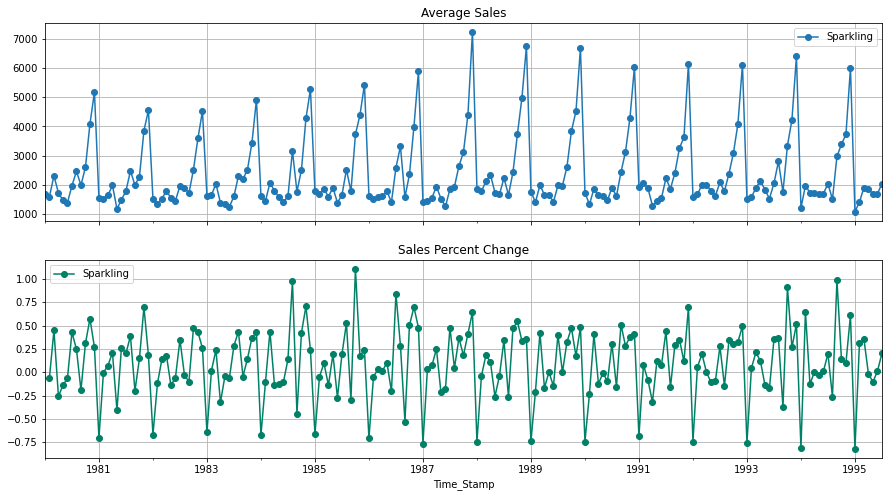

In [188]:

average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

In [189]:
from statsmodels.tsa.seasonal import seasonal_decompose

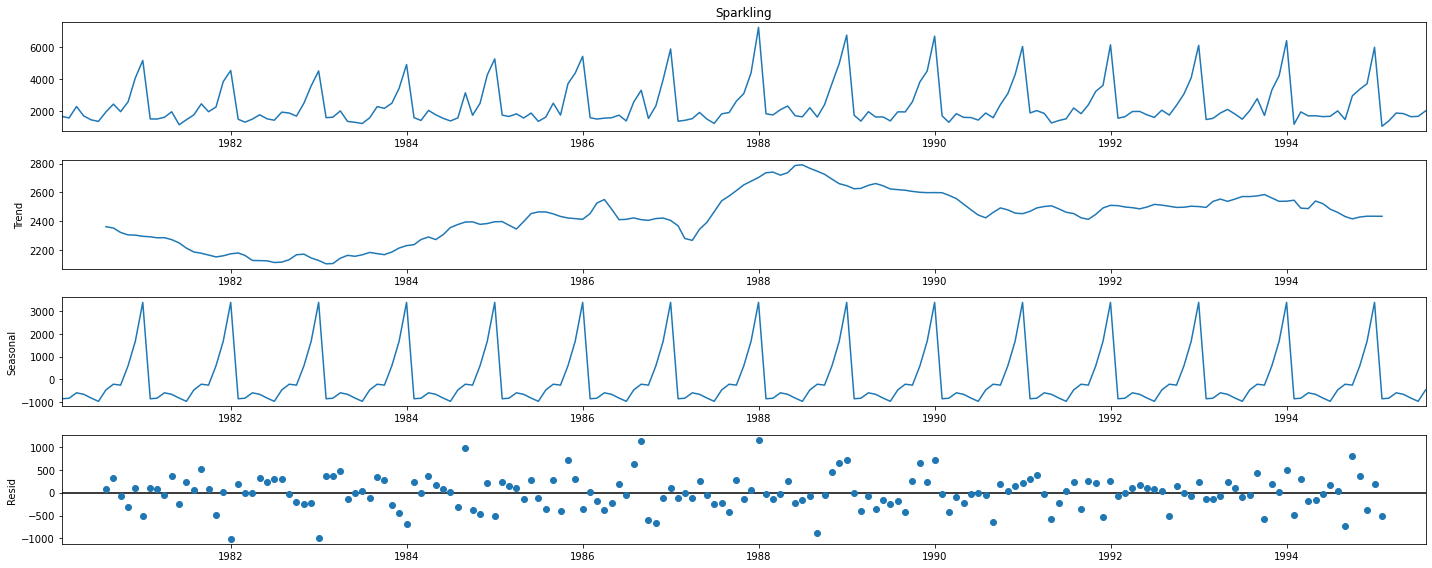

In [190]:
decomposition = seasonal_decompose(df.Sparkling,model='additive')
decomposition.plot();

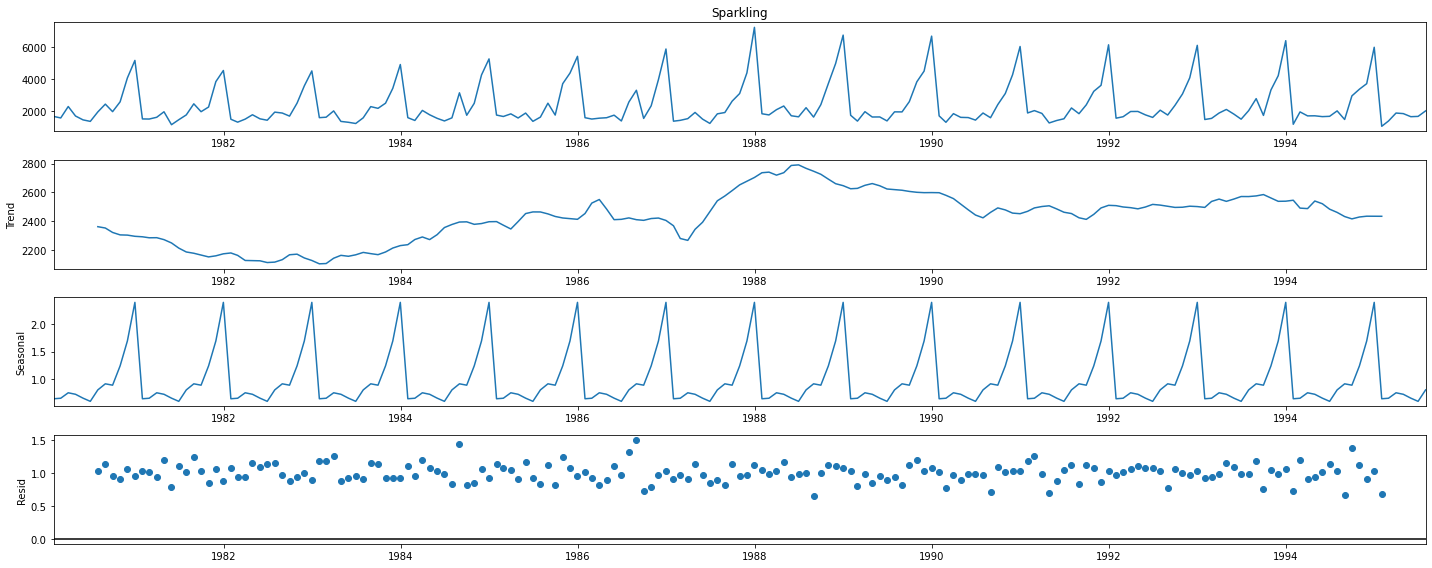

In [191]:
decomposition = seasonal_decompose(df.Sparkling,model='multiplicative')
decomposition.plot();

In [192]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [193]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [194]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2361.695896
1980-08-31    2352.468741
1980-09-30    2321.497620
1980-10-31    2304.490847
1980-11-30    2303.092089
1980-12-31    2294.738436
dtype: float64

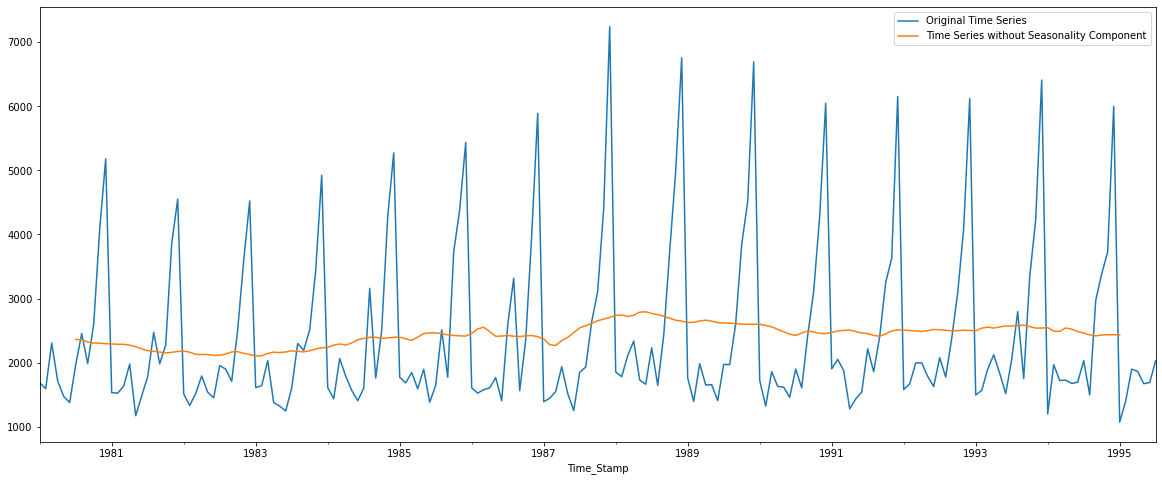

In [195]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [196]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [197]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [198]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [199]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


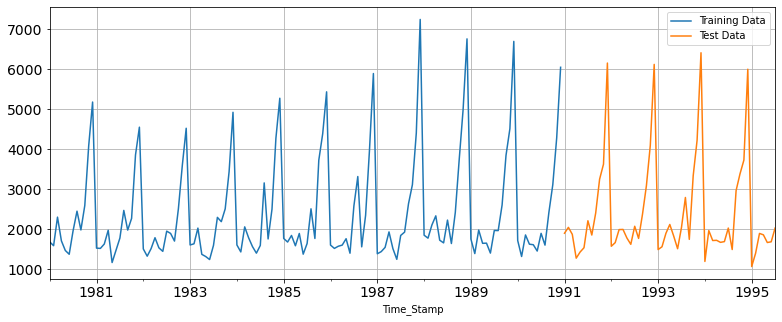

In [200]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [201]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [202]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [203]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
lr = LinearRegression()

In [206]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

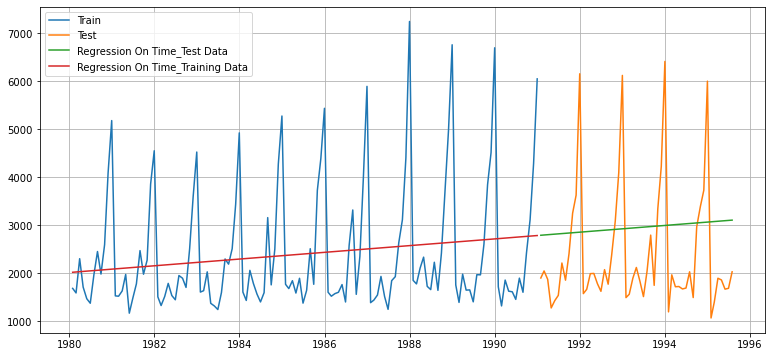

In [207]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [208]:
from sklearn import metrics

In [209]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [210]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.05


In [211]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [212]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

In [213]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [214]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [215]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

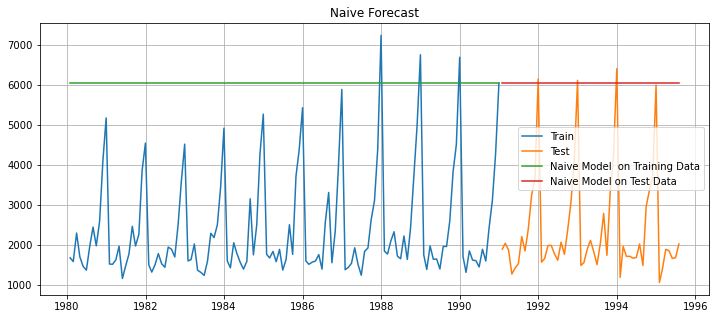

In [216]:
plt.figure(figsize=(12,5))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Model  on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Model on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [217]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [218]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For Naive Model on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Model on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [219]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

In [220]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [221]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
Time_Stamp                          
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [222]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

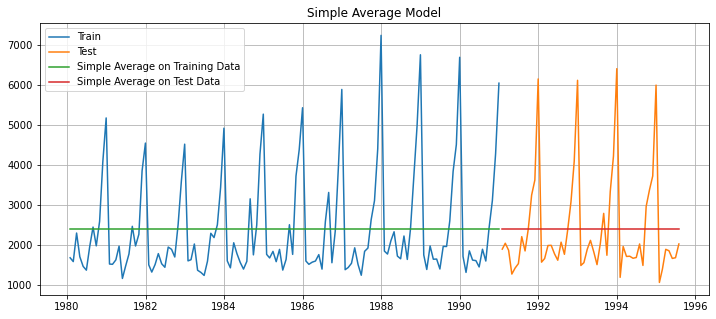

In [223]:
plt.figure(figsize=(12,5))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Model")
plt.grid();

In [224]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [225]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average Model on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average Model on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [226]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

In [227]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Trailing moving averages

In [228]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

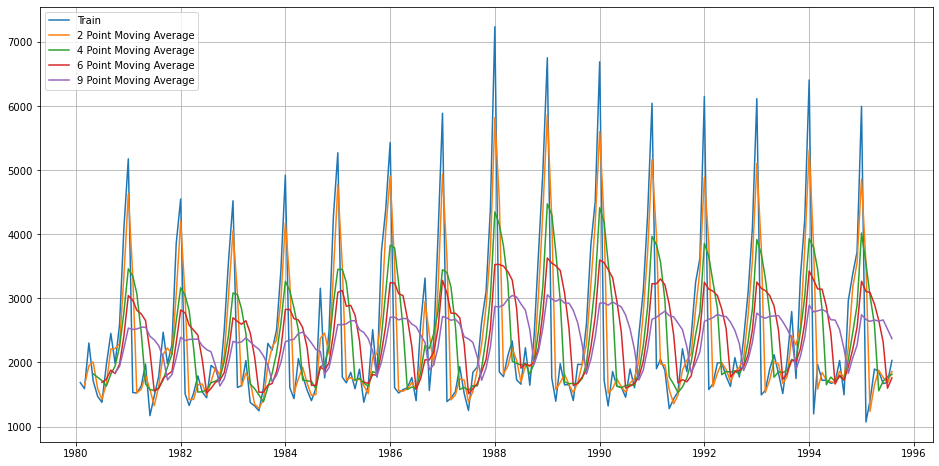

In [229]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [230]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

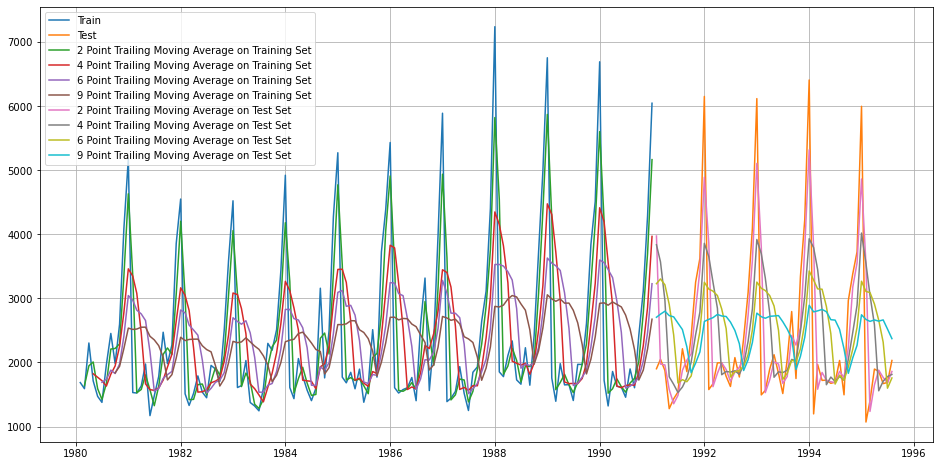

In [231]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [232]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 MAPE is 46.86


In [233]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90
2 point TMA          813.400684      19.70
4 point TMA         1156.589694      35.96
6 point TMA         1283.927428      43.86
9 point TMA         1346.278315      46.86

In [234]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [235]:
SES_train = train.copy()
SES_test = test.copy()

In [236]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [237]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


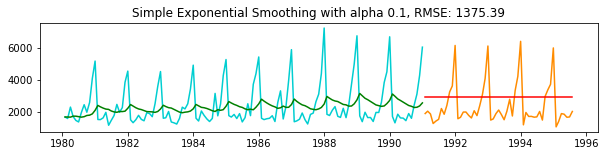

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


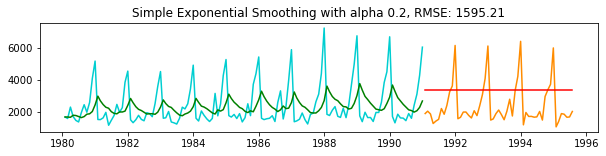

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


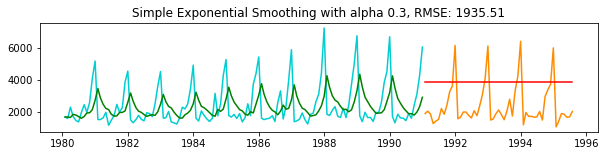

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


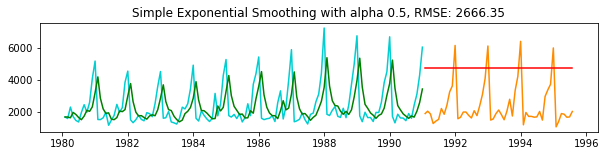

Test: For alpha = 0.60,  RMSE is 2979.2044 MAPE is 118.77
For smoothing level = 0.60,  Initial level 1686.00


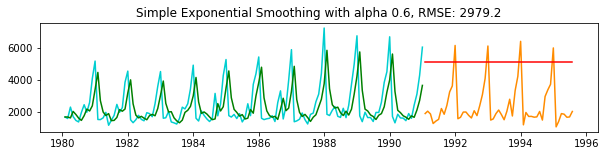

Test: For alpha = 0.70,  RMSE is 3249.9441 MAPE is 129.34
For smoothing level = 0.70,  Initial level 1686.00


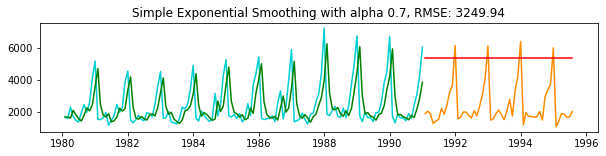

Test: For alpha = 0.80,  RMSE is 3483.8010 MAPE is 138.34
For smoothing level = 0.80,  Initial level 1686.00


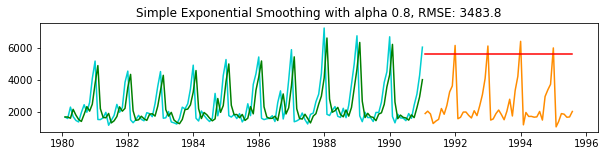

Test: For alpha = 0.90,  RMSE is 3686.7943 MAPE is 146.08
For smoothing level = 0.90,  Initial level 1686.00


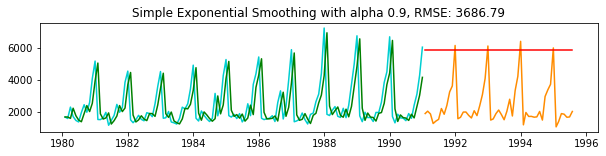

Test: For alpha = 1.00,  RMSE is 3864.2794 MAPE is 152.87
For smoothing level = 1.00,  Initial level 1686.00


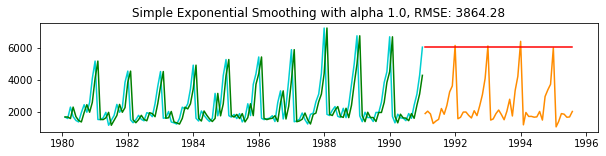

In [238]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.6,0.7,0.8, 0.9, 1.00]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_SES.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
   # plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
   # plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    #plt.legend(loc='best') 
    plt.show();

In [239]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [240]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling      predict
Time_Stamp                        
1980-01-31       1686  1818.535750
1980-02-29       1591  1811.961001
1980-03-31       2304  1800.999709
1980-04-30       1712  1825.952226
1980-05-31       1471  1820.299357

In [241]:
len(SES_test)

55

In [242]:
SES_test['predict'] = model_SES_autofit.forecast(len(SES_test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.932624
1991-02-28       2049  2724.932624
1991-03-31       1874  2724.932624
1991-04-30       1279  2724.932624
1991-05-31       1432  2724.932624

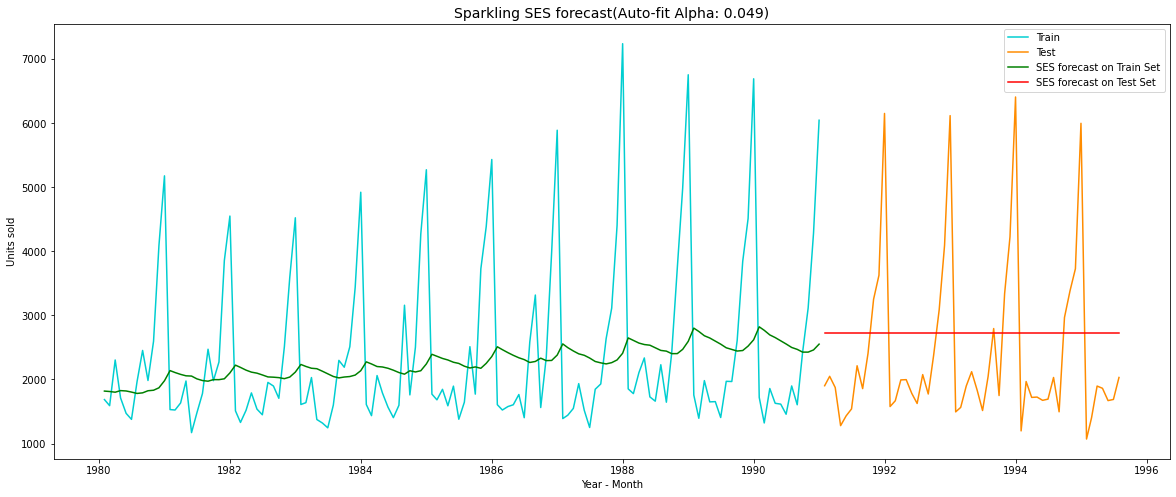

In [243]:
## Plotting on both the Training and Test data

#plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict'],color = 'green', label='SES forecast on Train Set')
plt.plot(SES_test['predict'],color = 'red', label='SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.049)', fontsize = 14);



In [244]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1315.232 and MAPE is 39.92


In [245]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1316.035 and MAPE is 45.47


In [246]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]}
                           ,index=['Alpha= 0.49,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverageModel                      1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
Alpha= 0.49,SimpleExponentialSmoothing  1316.035487      45.47

In [247]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [248]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [249]:
resultsDf_6

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.3  1359.511747       43.73  1935.507132      75.66
1           0.4  1352.588879       42.75  2311.919615      91.55
2           0.5  1344.004369       41.16  2666.351413     106.27
3           0.6  1338.805381       39.80  2979.204388     118.77
4           0.7  1338.844308       38.55  3249.944092     129.34
5           0.8  1344.462091       37.60  3483.801006     138.34
6           0.9  1355.723518       36.79  3686.794285     146.08

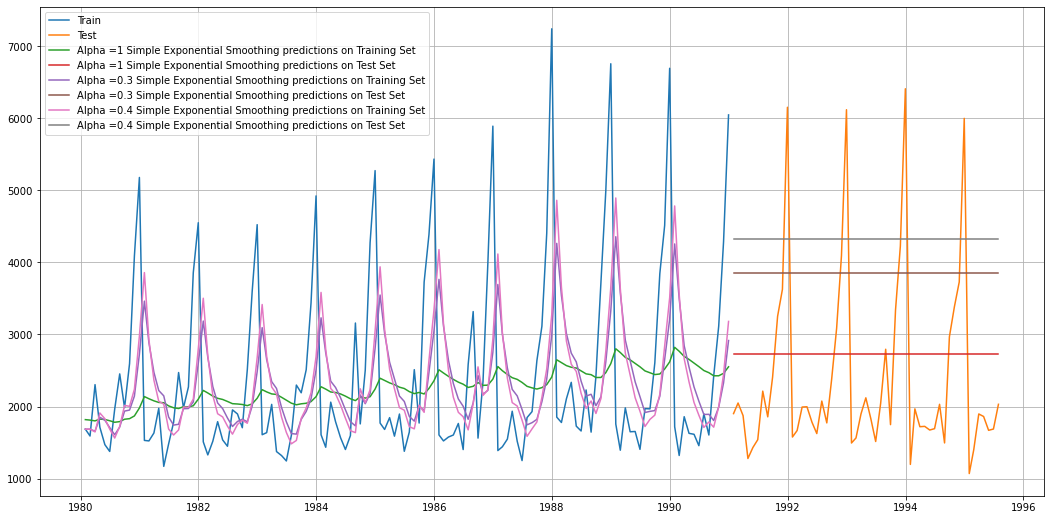

In [250]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [251]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverageModel                      1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
Alpha= 0.49,SimpleExponentialSmoothing  1316.035487      45.47
Alpha=0.3,SimpleExponentialSmoothing    1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing    2311.919615      91.55

In [252]:
DES_train = train.copy()
DES_test = test.copy()

In [253]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [254]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [255]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

C:\Users\MB Reddy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MB Reddy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MB Reddy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MB Reddy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipyker

In [256]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1592.292788       53.75  18259.110704   
1            0.3          0.4  1682.573828       57.13  26069.841401   
2            0.3          0.5  1771.710791       59.92  34401.512440   
3            0.3          0.6  1848.576510       62.06  42162.748095   
4            0.3          0.7  1899.949006       62.87  47832.397419   
..           ...          ...          ...         ...           ...   
59           1.0          0.6  1753.402326       45.75  49327.087977   
60           1.0          0.7  1825.187155       47.97  52655.765663   
61           1.0          0.8  1902.013709       50.11  55442.273880   
62           1.0          0.9  1985.368445       52.03  57823.177011   
63           1.0          1.0  2077.672157       53.81  59877.076519   

    Test MAPE  
0      675.28  
1      960.18  
2     1264.55  
3     1548.94  
4     1757.91  
..        ...  
59    1824.42  
60    1945.23  
61    2046.36  
62    2132.75  
63    2207.28  

[64 rows x 6 columns]

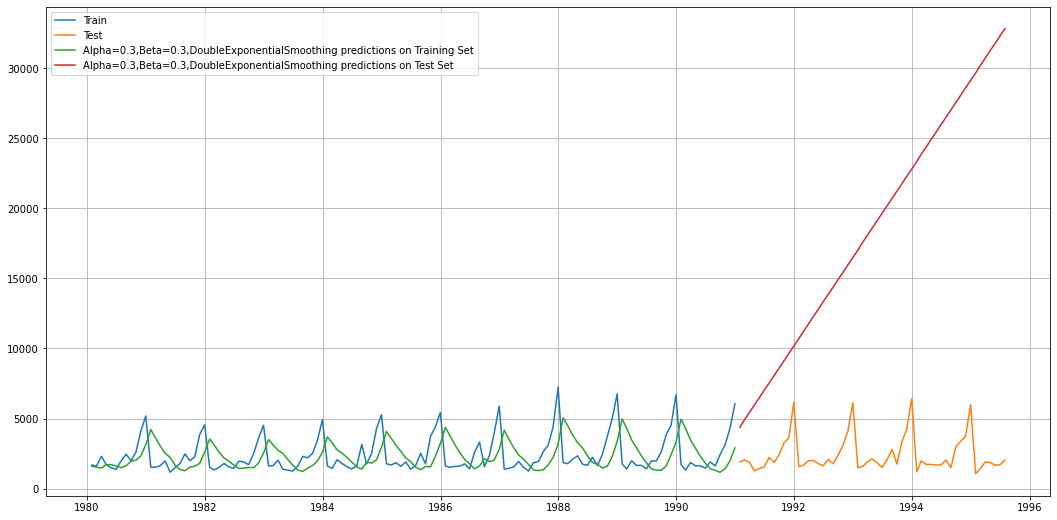

In [257]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [258]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                1389.135175      50.15
NaiveModel                                      3864.279352     152.87
SimpleAverageModel                              1275.081804      38.90
2 point TMA                                      813.400684      19.70
4 point TMA                                     1156.589694      35.96
6 point TMA                                     1283.927428      43.86
9 point TMA                                     1346.278315      46.86
Alpha= 0.49,SimpleExponentialSmoothing          1316.035487      45.47
Alpha=0.3,SimpleExponentialSmoothing            1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing            2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704     675.28

In [259]:
TES_train = train.copy()
TES_test = test.copy()

In [260]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [261]:
model_TES_autofit = model_TES.fit()

In [262]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [263]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
Time_Stamp                         
1980-01-31       1686   1731.915187
1980-02-29       1591   1648.271331
1980-03-31       2304   2238.471955
1980-04-30       1712   1903.256752
1980-05-31       1471   1515.132699

In [264]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1577.224489
1991-02-28       2049   1333.677558
1991-03-31       1874   1745.945679
1991-04-30       1279   1630.411925
1991-05-31       1432   1523.289070

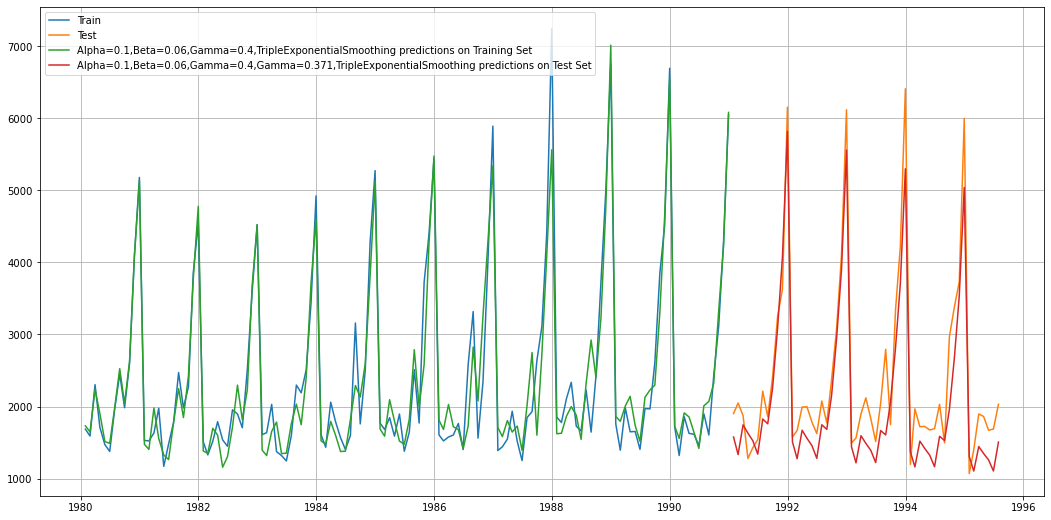

In [265]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.1,Beta=0.06,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1,Beta=0.06,Gamma=0.4,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [266]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.1541983771982372,Beta: 5.189414295988849e-21 and Gamma: 0.3713299858378782, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.1541983771982372,Beta: 5.189414295988849e-21 and Gamma: 0.3713299858378782, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 356.975 MAPE is 10.25


In [267]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.1,Beta:0.06 and Gamma: 0.4, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.1,Beta:0.06 and Gamma: 0.4, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768 MAPE is 16.40


In [268]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=[' Alpha: 0.1,Beta:0.06 and Gamma: 0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2 point TMA                                           813.400684      19.70
4 point TMA                                          1156.589694      35.96
6 point TMA                                          1283.927428      43.86
9 point TMA                                          1346.278315      46.86
Alpha= 0.49,SimpleExponentialSmoothing               1316.035487      45.47
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
 Alpha: 0.1,Beta:0.06 and Gamma: 0.4,TripleExpo...    469.767970      16.40

In [269]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                        Test RMSE  Test MAPE
 Alpha: 0.1,Beta:0.06 and Gamma: 0.4,TripleExpo...    469.767970      16.40
2 point TMA                                           813.400684      19.70
4 point TMA                                          1156.589694      35.96
SimpleAverageModel                                   1275.081804      38.90
6 point TMA                                          1283.927428      43.86
Alpha= 0.49,SimpleExponentialSmoothing               1316.035487      45.47
9 point TMA                                          1346.278315      46.86
RegressionOnTime                                     1389.135175      50.15
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
NaiveModel                                           3864.279352     152.87
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing 

In [270]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1541983771982372,
                                                                 smoothing_slope=5.189414295988849e-21,
                                                                 smoothing_seasonal=0.3713299858378782)

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\MB Reddy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """


In [271]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df['Sparkling'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 356.16946550956544 
MAPE: 10.22


In [272]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

In [273]:
prediction_1

1995-08-31    1861.593087
1995-09-30    2403.009716
1995-10-31    3148.439457
1995-11-30    3798.644187
1995-12-31    5918.600250
1996-01-31    1268.518034
1996-02-29    1603.752692
1996-03-31    1842.839075
1996-04-30    1811.476772
1996-05-31    1646.323714
1996-06-30    1578.455009
1996-07-31    1928.488922
1996-08-31    1821.042483
1996-09-30    2350.570384
1996-10-31    3079.607919
1996-11-30    3715.446227
1996-12-31    5788.733954
1997-01-31    1240.633145
1997-02-28    1568.433889
1997-03-31    1802.180351
1997-04-30    1771.436379
1997-05-31    1609.866667
1997-06-30    1543.436259
1997-07-31    1885.625263
1997-08-31    1780.491879
1997-09-30    2298.131052
1997-10-31    3010.776382
1997-11-30    3632.248267
1997-12-31    5658.867658
1998-01-31    1212.748255
1998-02-28    1533.115086
1998-03-31    1761.521627
1998-04-30    1731.395987
1998-05-31    1573.409620
1998-06-30    1508.417509
1998-07-31    1842.761603
1998-08-31    1739.941276
1998-09-30    2245.691719
1998-10-31  

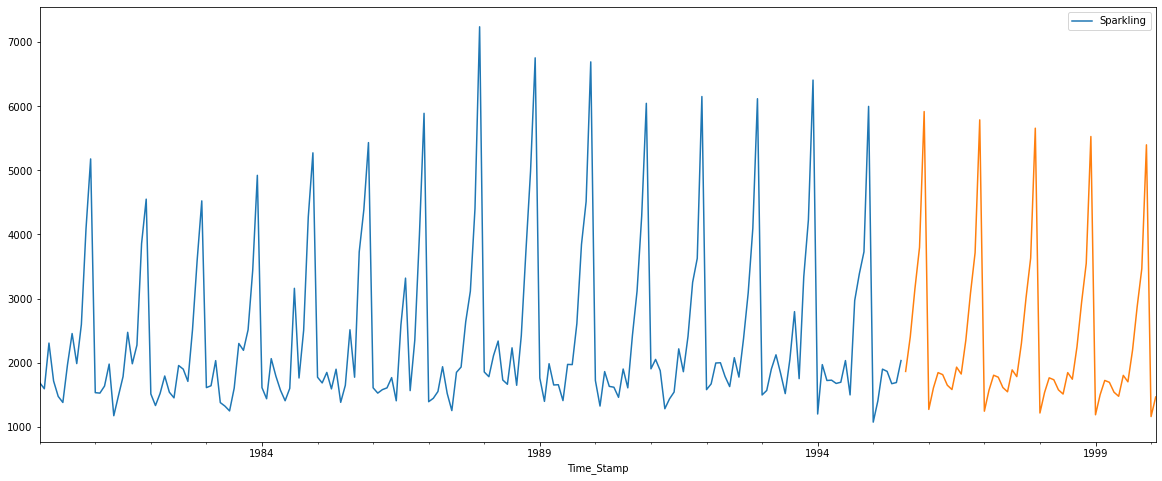

In [274]:
df.plot()
prediction_1.plot();

In [275]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

lower_CI   prediction      upper_ci
1995-08-31   666.970010  1861.593087   7604.873837
1995-09-30  1208.386639  2403.009716   8146.290467
1995-10-31  1953.816380  3148.439457   8891.720207
1995-11-30  2604.021110  3798.644187   9541.924937
1995-12-31  4723.977173  5918.600250  11661.881000

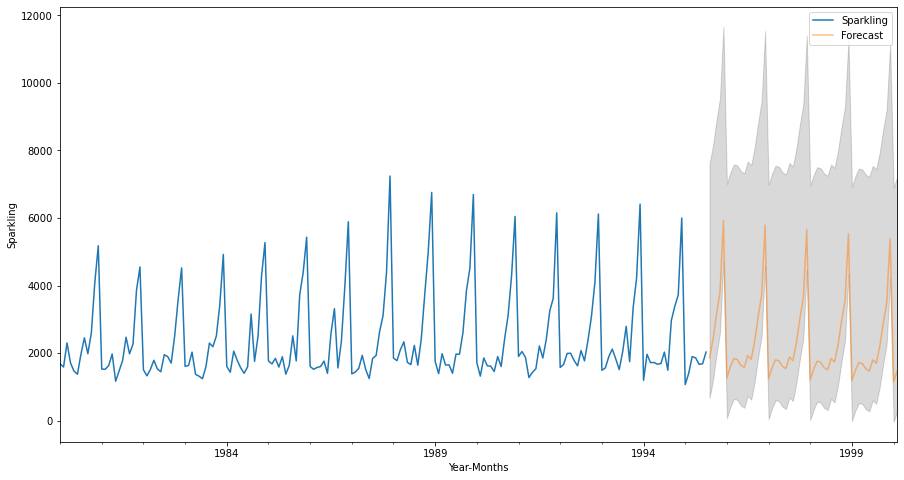

In [276]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [277]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

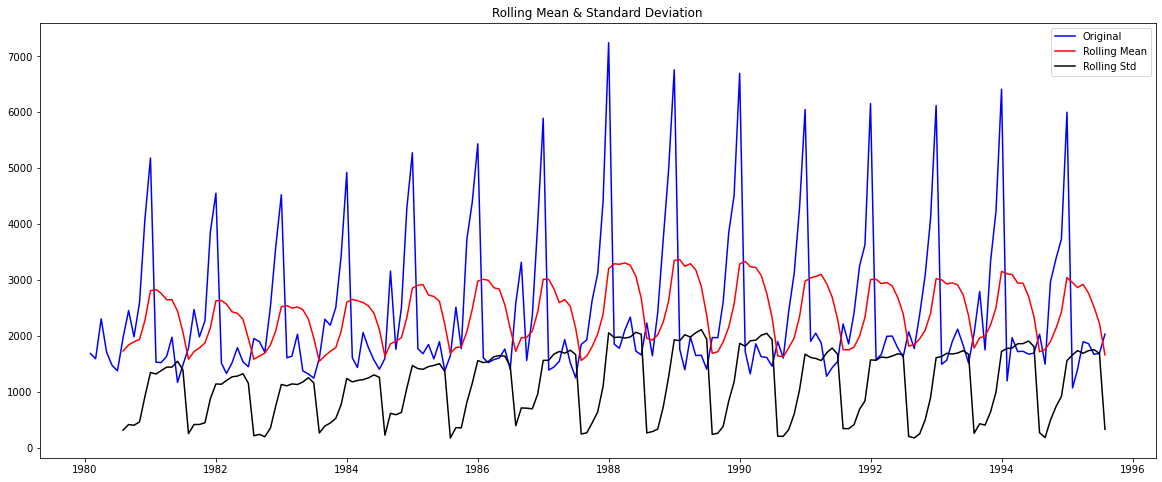

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [278]:
test_stationarity(df['Sparkling'])

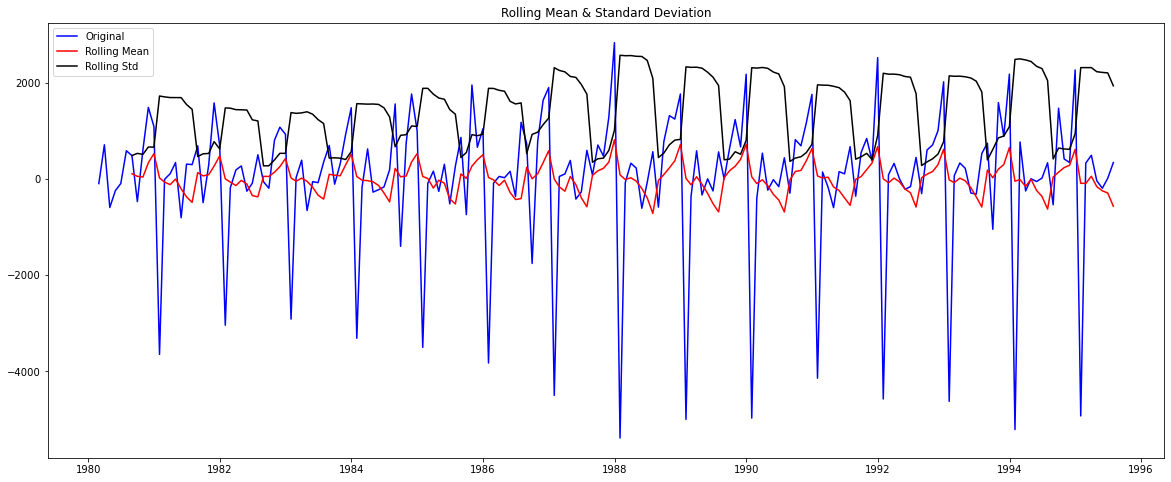

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [279]:
test_stationarity(df['Sparkling'].diff().dropna())

In [280]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [281]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [282]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.7830976841665
ARIMA(1, 1, 0) - AIC:2268.5280605942976


C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:2235.0139453494457
ARIMA(1, 1, 2) - AIC:2233.5976471189274
ARIMA(2, 1, 0) - AIC:2262.0356001096925


C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 1) - AIC:2232.360489886391
ARIMA(2, 1, 2) - AIC:2210.6189875760692


C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [283]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.618988
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [284]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.929
Date:                Sat, 27 Feb 2021   AIC                           2210.619
Time:                        19:31:51   BIC                           2227.870
Sample:                    02-29-1980   HQIC                          2217.629
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.806      0.000       4.572       6.598
ar.L1.D.Sparkling     1.2699      0.075     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [285]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [286]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.484105408576


In [287]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])
resultsDf

RMSE
ARIMA(2,1,2)  1374.484105

In [288]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

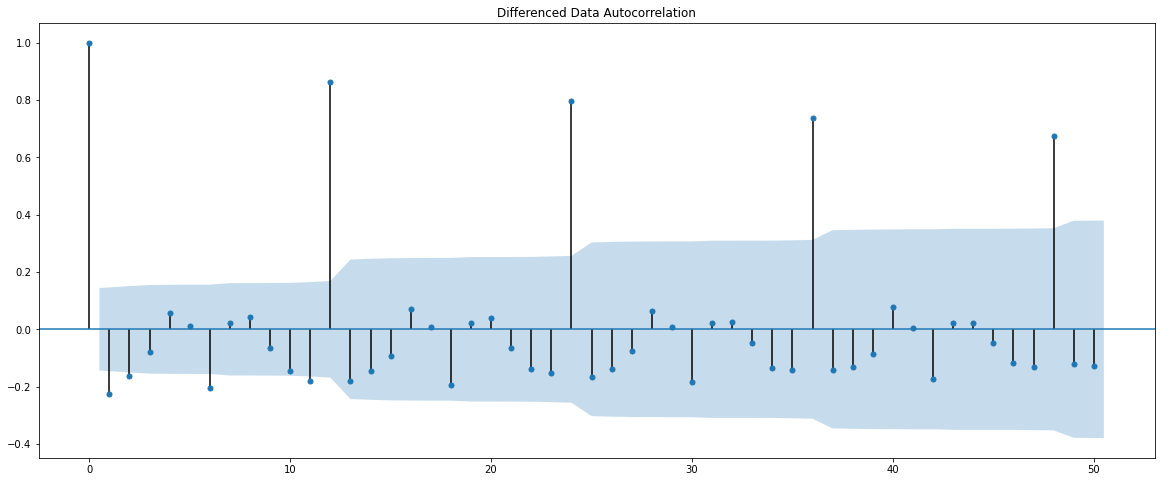

In [289]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [290]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [291]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [292]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.63555368896
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.5599844433514
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.936011814821
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.4012986872265
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993617510443
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.9177805657127
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1918.1876339544094
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:2139.573242877799
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:2006.51742981393
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1855.7093277683998
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1798.788510402788
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1800.7717933217916
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1741.703707108539
SARIMA(0, 1, 2)x(0, 0

In [293]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678698
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888814
17  (0, 1, 1)  (2, 0, 2, 6)  1741.703707
44  (1, 1, 1)  (2, 0, 2, 6)  1743.330541
71  (2, 1, 1)  (2, 0, 2, 6)  1744.040751

In [294]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sat, 27 Feb 2021   AIC                           1727.679
Time:                                   19:32:26   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

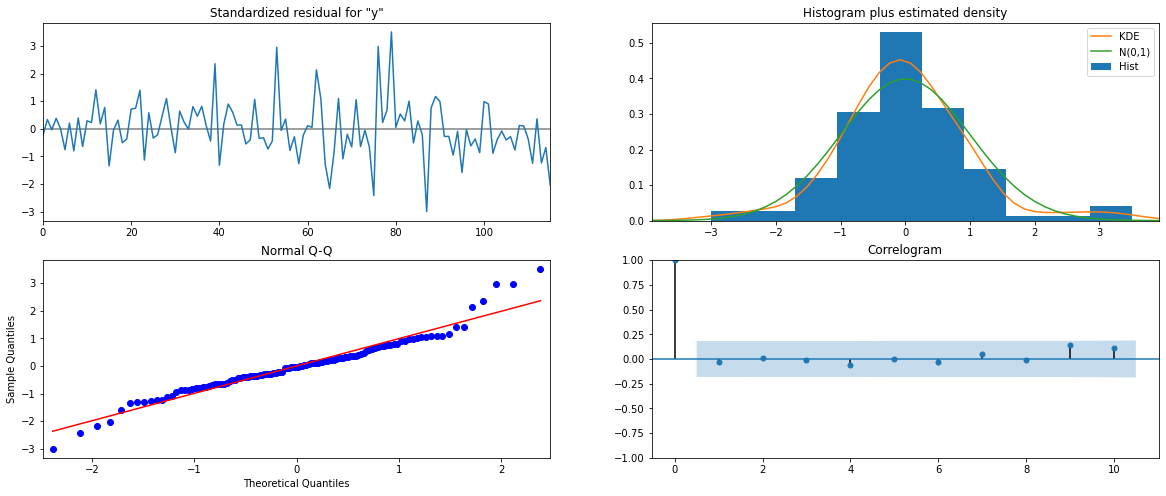

In [295]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [296]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [297]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.382316  380.556609     584.505068    2076.259563
1  1177.257047  392.107264     408.740930    1945.773163
2  1625.929998  392.301428     857.033328    2394.826668
3  1546.321157  397.701601     766.840342    2325.801971
4  1308.751650  398.920807     526.881235    2090.622066

In [298]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.9311377848303


In [299]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            1374.484105
SARIMA(0,1,2)(2,0,2,6)   626.931138

In [300]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [301]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [302]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616846681
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640235787
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.990530138973
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791164
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158610053
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920817
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566444
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572878215
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881839018
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319376473
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1509143900523
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954178783
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245085614381
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.401882367

In [303]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1556.076771
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [304]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 27 Feb 2021   AIC                           1555.584
Time:                                    19:33:16   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

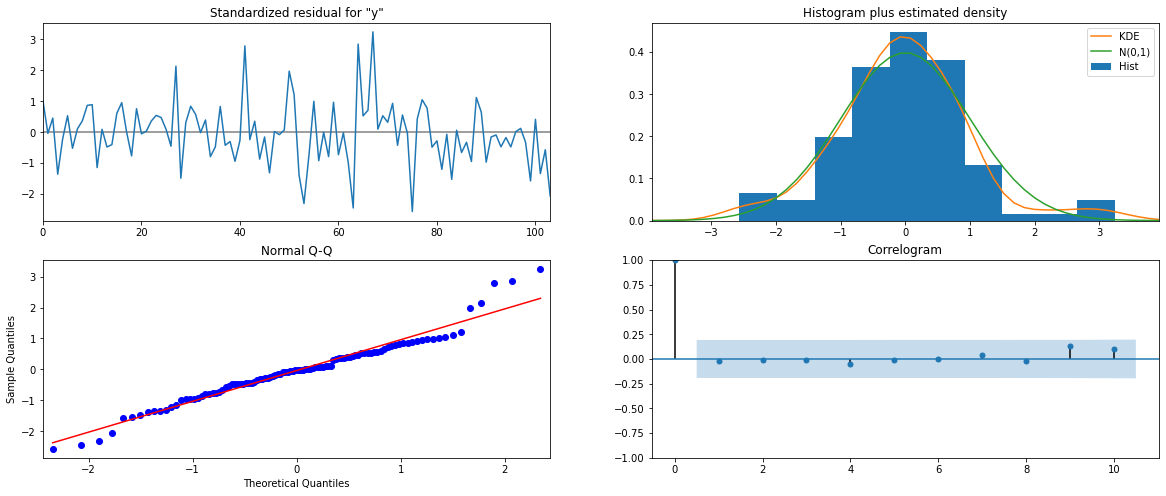

In [305]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [306]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [307]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.416698  388.338122     566.287965    2088.545430
1  1315.162146  402.001930     527.252842    2103.071450
2  1621.635228  401.995527     833.738474    2409.531983
3  1598.910009  407.232465     800.749045    2397.070973
4  1392.734434  407.962339     593.142942    2192.325926

In [308]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5668170366393


In [309]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             1374.484105
SARIMA(0,1,2)(2,0,2,6)    626.931138
SARIMA(1,1,2)(2,0,2,12)   528.566817

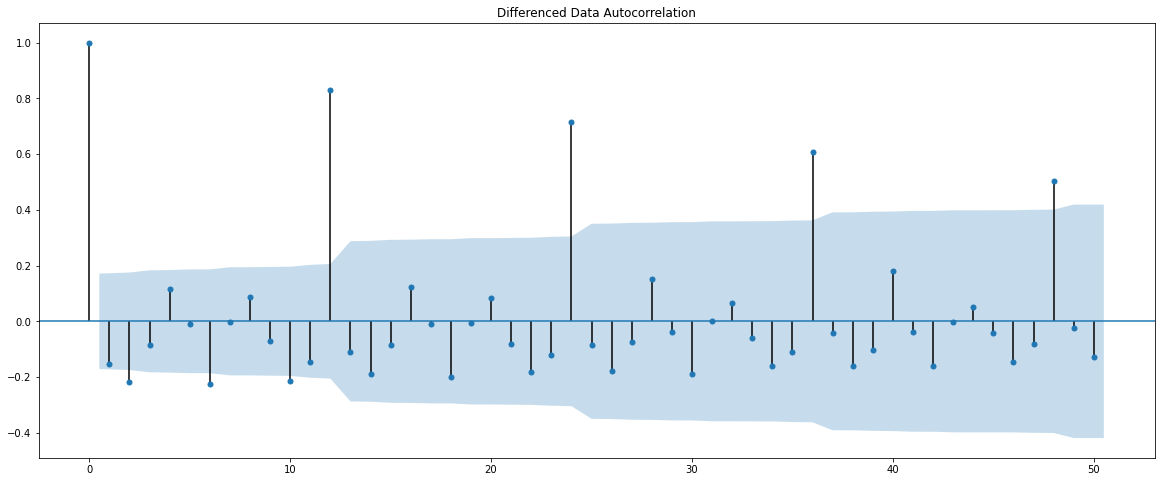

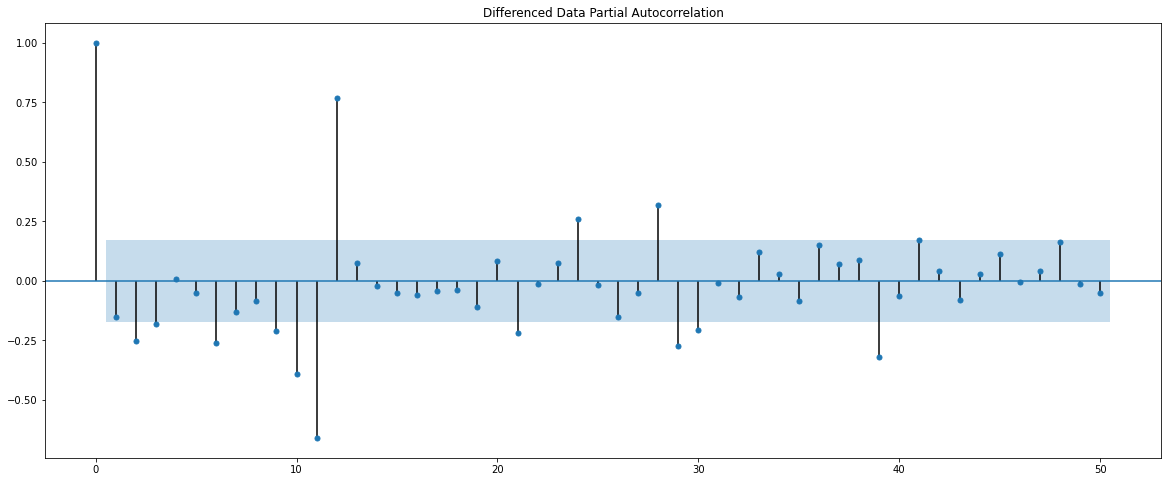

In [310]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [311]:
from statsmodels.tsa.arima_model import ARIMA
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.929
Date:                Sat, 27 Feb 2021   AIC                           2210.619
Time:                        19:33:18   BIC                           2227.870
Sample:                    02-29-1980   HQIC                          2217.629
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.806      0.000       4.572       6.598
ar.L1.D.Sparkling     1.2699      0.075     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [312]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [313]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1374.484105408576


In [314]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             1374.484105
SARIMA(0,1,2)(2,0,2,6)    626.931138
SARIMA(1,1,2)(2,0,2,12)   528.566817
ARIMA(2,1,2)             1374.484105

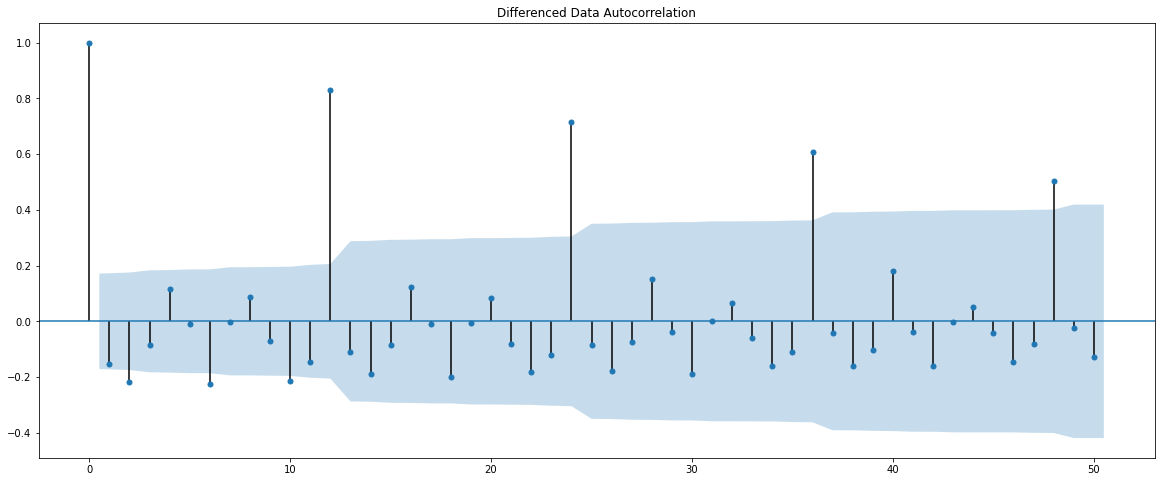

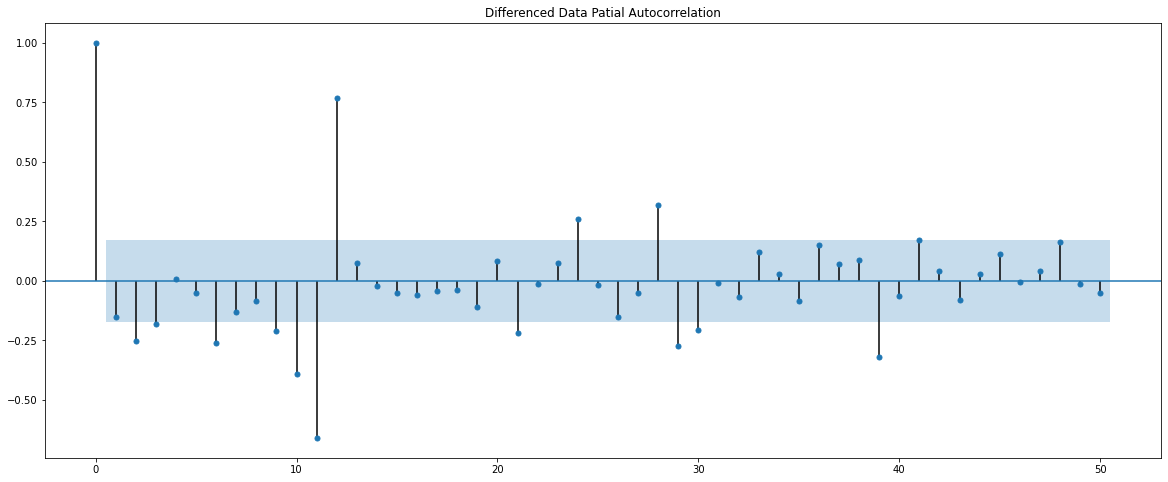

In [315]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

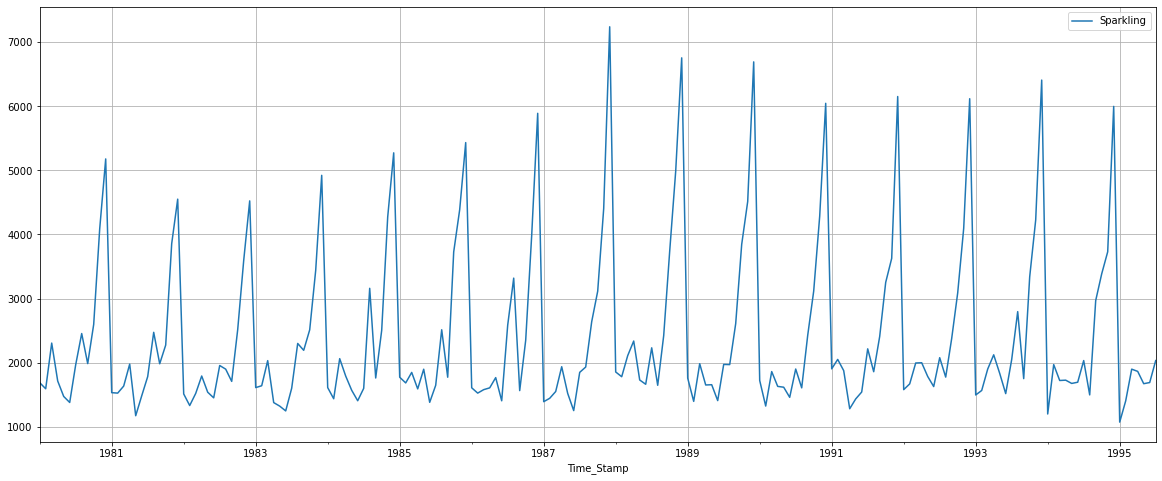

In [316]:
df.plot()
plt.grid();

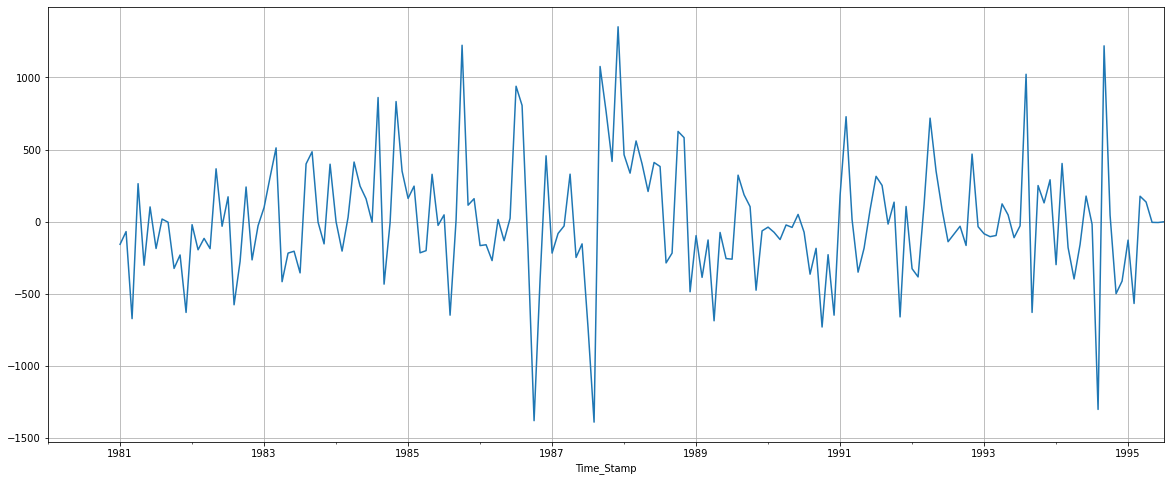

In [317]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

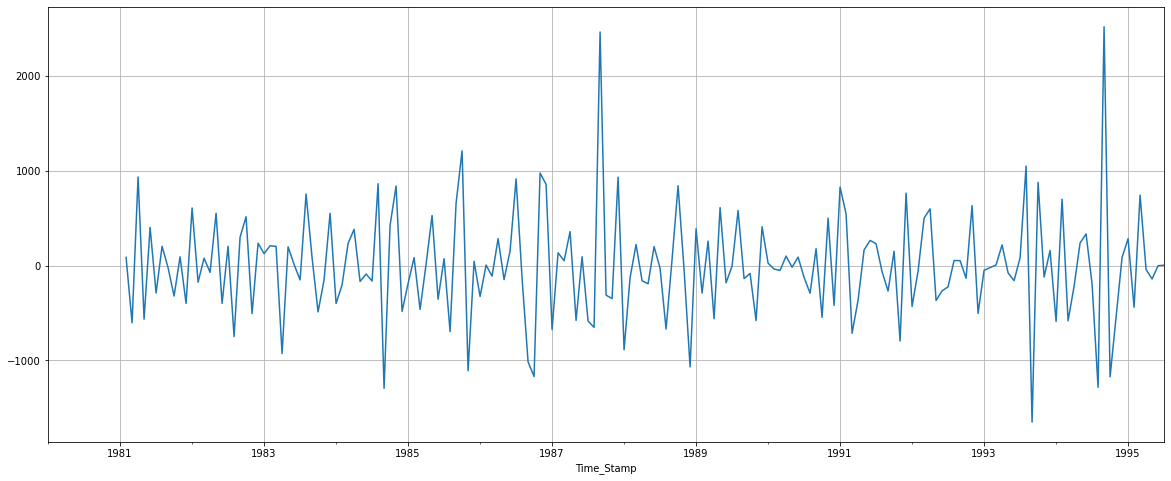

In [318]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

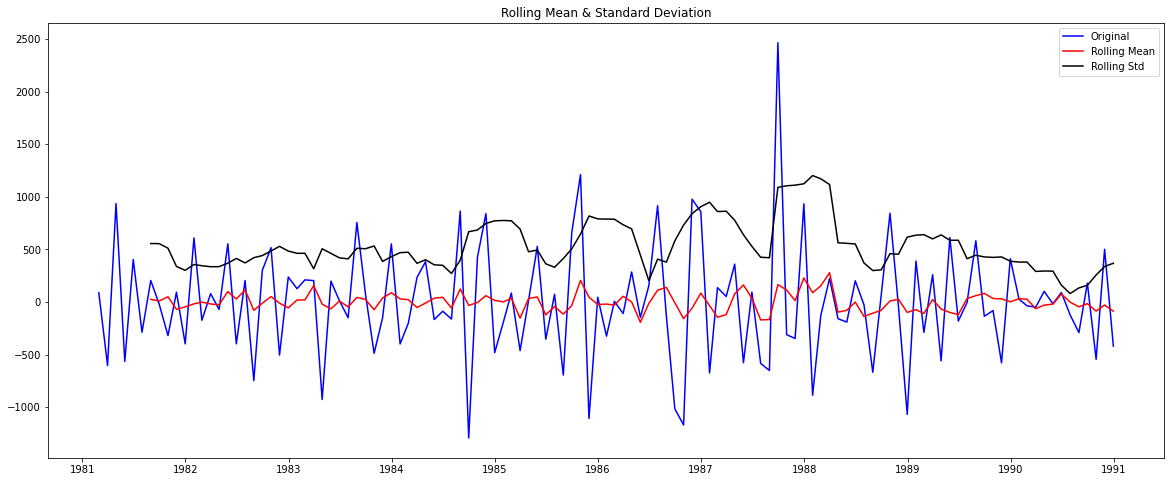

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [319]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

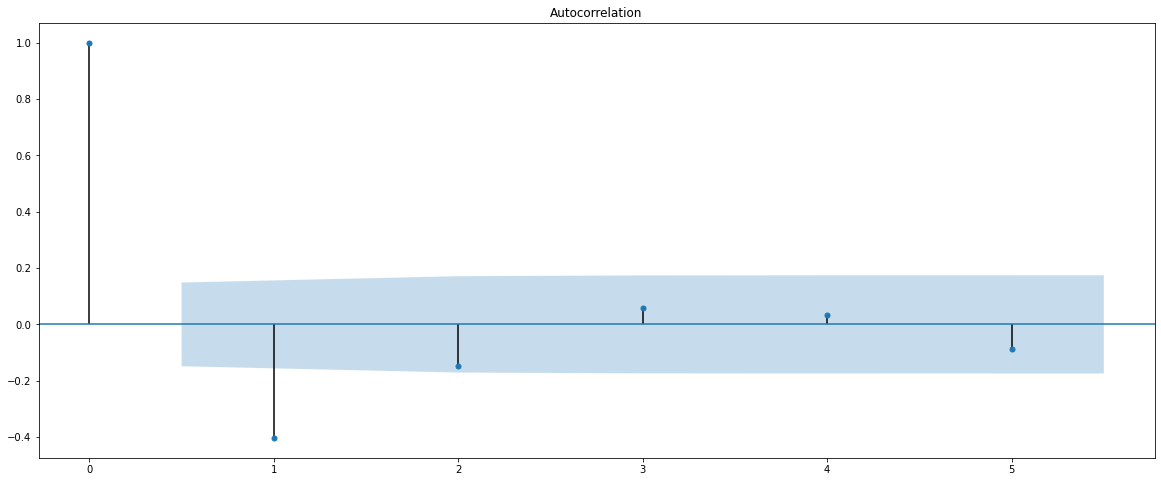

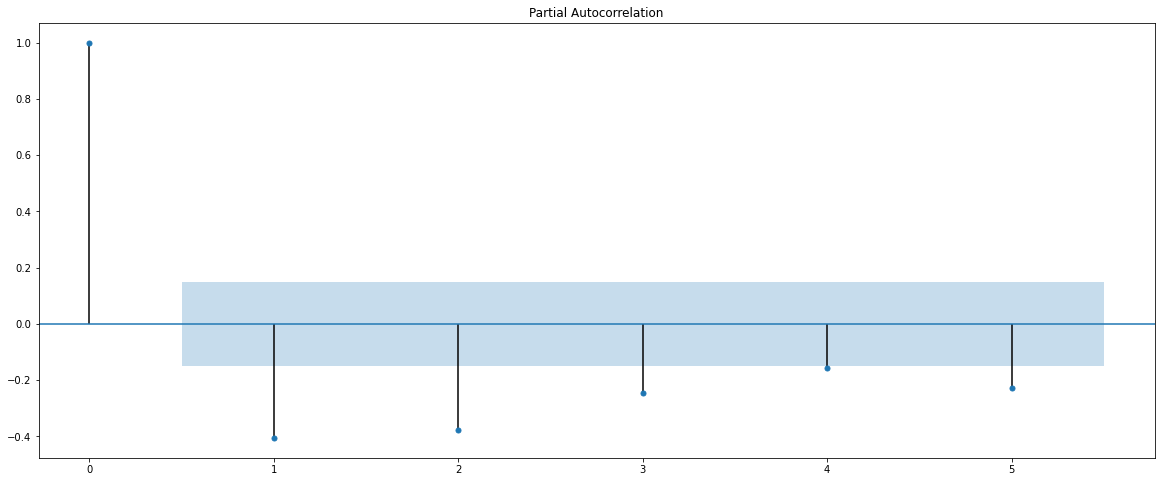

In [320]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=5)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=5);

In [321]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -606.105
Date:                              Sat, 27 Feb 2021   AIC                           1230.209
Time:                                      19:33:22   BIC                           1251.759
Sample:                                           0   HQIC                          1238.856
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5701      0.339     -1.682      0.092      -1.234       0.094
ar.L2          0.03

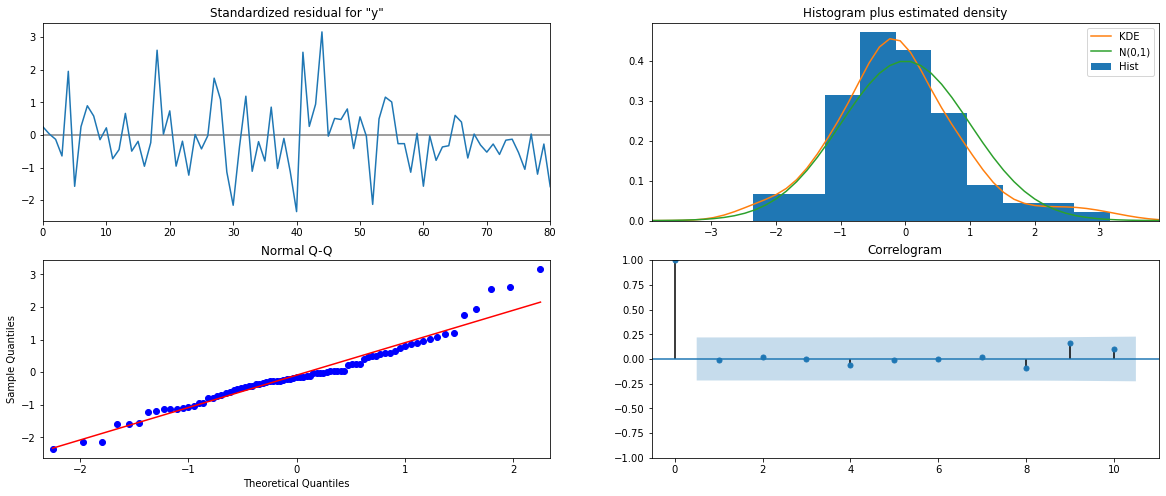

In [322]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [323]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [324]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1488.215846  429.370606     646.664923    2329.766769
1  1439.292564  445.053943     567.002865    2311.582263
2  1788.428180  445.381418     915.496641    2661.359719
3  1739.956395  448.066133     861.762911    2618.149879
4  1561.594123  448.117748     683.299476    2439.888770

In [325]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

337.3587215314254


In [326]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(3, 1, 1, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                1374.484105
SARIMA(0,1,2)(2,0,2,6)       626.931138
SARIMA(1,1,2)(2,0,2,12)      528.566817
ARIMA(2,1,2)                1374.484105
SARIMA(2,1,2)(3, 1, 1, 12)   337.358722

In [327]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\MB Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(3, 1, [1], 12)   Log Likelihood               -1006.928
Date:                              Sat, 27 Feb 2021   AIC                           2031.855
Time:                                      19:33:29   BIC                           2058.069
Sample:                                  01-31-1980   HQIC                          2042.508
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7443      0.252     -2.951      0.003      -1.239      -0.250
ar.L2          0.01

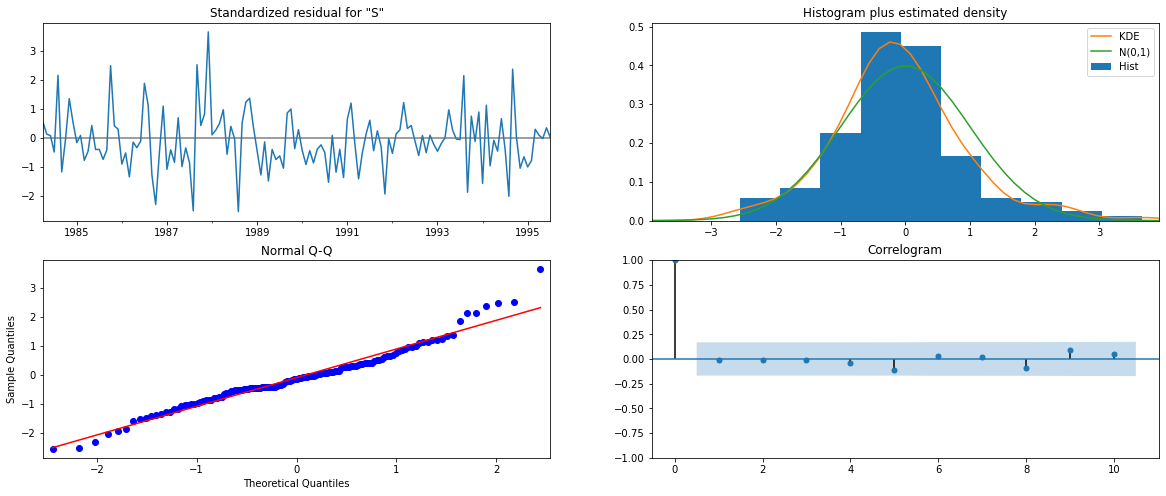

In [328]:
results_full_data_model.plot_diagnostics();

In [329]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [330]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head(12)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1996.049494  379.471989    1252.298063    2739.800925
1995-09-30  2409.418920  384.118445    1656.560602    3162.277238
1995-10-31  3259.489619  384.121951    2506.624428    4012.354809
1995-11-30  4031.064949  386.058416    3274.404359    4787.725540
1995-12-31  6118.917334  386.104195    5362.167018    6875.667650
1996-01-31  1372.604264  387.022958     614.053206    2131.155323
1996-02-29  1584.431027  387.182901     825.566485    2343.295570
1996-03-31  1856.673601  387.816003    1096.568203    2616.778998
1996-04-30  1828.961367  388.119417    1068.261288    2589.661445
1996-05-31  1693.598757  388.749684     931.663378    2455.534136
1996-06-30  1578.367019  389.145356     815.656137    2341.077902
1996-07-31  2022.822861  389.735315    1258.955680    2786.690041

In [331]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 581.8504815891278


In [332]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

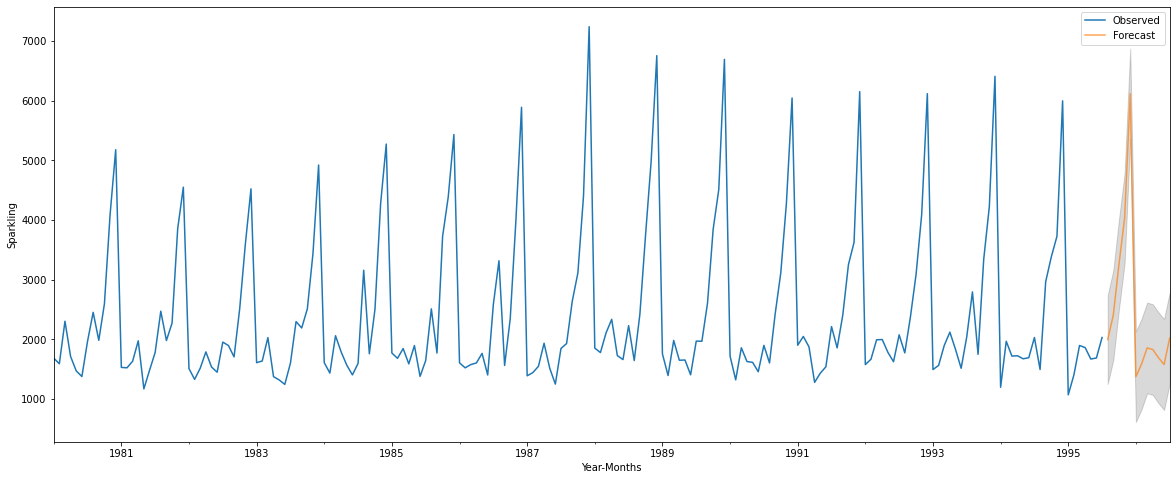

In [333]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

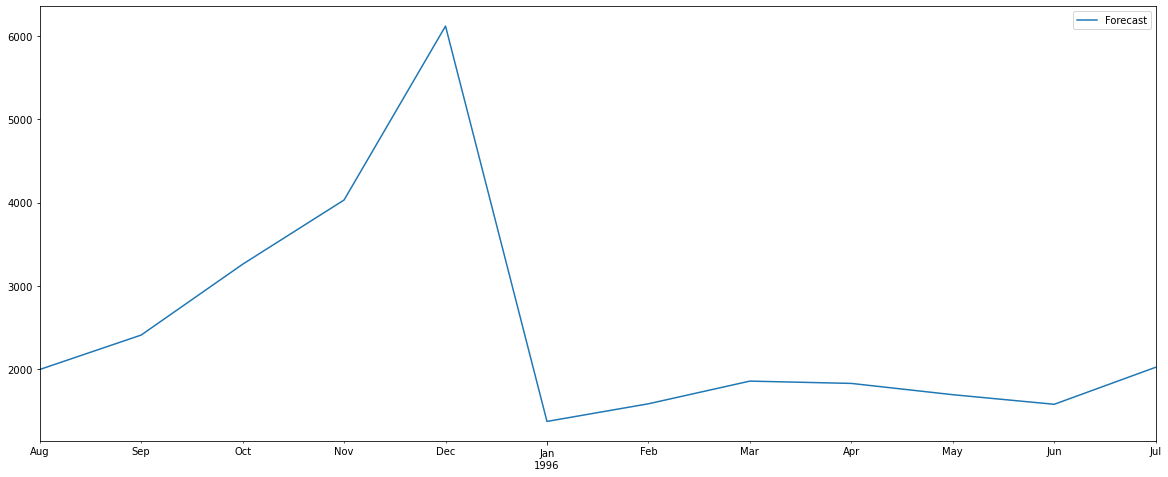

In [334]:
pred_full_manual_SARIMA_date['mean'].plot(label = 'Forecast');
plt.legend(loc='best')
plt.show()